In [1]:
import sys
import os
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

sys.path.insert(0,'../../')
sys.path.insert(0,'../../py')

import parameters

Non-linear chirps are modelled as 

S(t) = Acos(2\pi(sigma_{i=1}^{n}(\frac{1}{i}a_{i-1}t^i)))

We will use a cubic non-linear chirp of the form

S(t) = Acos(2\pi(a_0t, a_1t^2/2, a_2t^3/3))

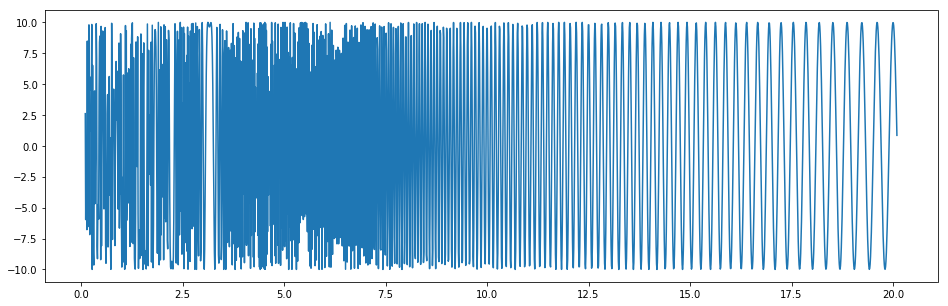

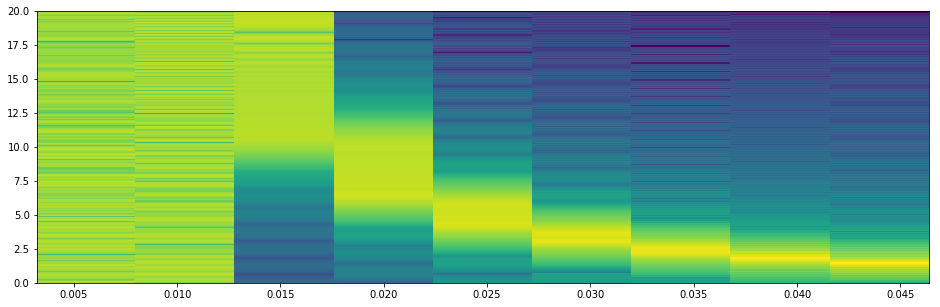

(2000,) (257, 10)


In [67]:
# constants
data_point = 1000
duration = 20
amplitude = 10
A = 10
t_start = 0.1
t = t_start+np.array(list(range(5,duration*data_point,int(data_point/100))))/data_point
b = 10
a = amplitude*[100*b, 0,0,0,0,0,b,b,b,0,10*b]
_a = list(range(len(a)))
# print(_a)
# chirp
chirp = A*np.cos(2*np.pi*(sum(np.array(list(map(lambda i: (a[i]/(i+1))*(t**(-i-1)), _a))))))
# print(chirp)
# plot
plt.figure(figsize=(16,5))
plt.plot(t, chirp)

# spectrogram
frequencies, times, chirp_spec = signal.spectrogram(chirp, fs=40000, detrend=parameters.detrend, nfft=parameters.nfft, 
                                                        noverlap=parameters.noverlap, scaling=parameters.scaling)

plt.figure(figsize=(16,5))
plt.pcolormesh(times,frequencies/1000,np.log10(chirp_spec))
plt.show()
print(chirp.shape,chirp_spec.shape)

In [11]:
import utilities
import spectrogram_utilities

awd_event = 1
site = parameters.sites[0]
file = utilities.random_file(awd_event,site)
data_location = os.path.join(parameters.database_location, 'awdEvents'+str(awd_event), site, site+'_data')
    
whdf, fs = spectrogram_utilities.vr2_to_panda(data_location, file, site)

print(whdf.shape, fs)

(163840, 2) 40000.0
